In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

from sklearn import metrics
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingClassifier

from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Testing on Iris dataset

In [ ]:
iris = datasets.load_iris()

In [ ]:
print(iris.target_names)
print(iris.feature_names)

In [ ]:
# print the iris data (top 5 records)
print(iris.data[0:5])

# print the iris labels (0:setosa, 1:versicolor, 2:virginica)
print(iris.target)

In [ ]:
X = data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y = data['species']  # Labels

print(X)
print(y)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [ ]:
X_train.info()

In [ ]:
X_test.info()

In [ ]:
y_train.info()
y_train

In [ ]:
y_test.info()
y_test

* RandomForest Prediction

In [ ]:
#Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators = 500, max_leaf_nodes = 16, n_jobs = -1)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [ ]:
plt.figure(figsize = (12,2))

plt.scatter(np.linspace(0, 1, len(y_test)), y_pred, color = 'r')
plt.scatter(np.linspace(0, 1, len(y_test)), y_test, color = 'b')
plt.legend(['prediction', 'classified data'], loc = (1.05,0))

for i in np.linspace(0, 1, len(y_test)):
    plt.plot([i,i], [0,2], color = 'violet', alpha = 0.3)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

You can also make a prediction for a single item, for example:

sepal length = 3

sepal width = 5

petal length = 4

petal width = 2

Now you can predict which type of flower it is.

In [ ]:
# clf.predict([[3, 5, 4, 1]])      # (0:setosa, 1:versicolor, 2:virginica)

# Testing on Red wine dataset
* Load file

In [ ]:
def load_wine_data(path_to_dir, filename, csv_separator):
    csv_path = os.path.join(path_to_dir, filename)
    return pd.read_csv(csv_path, sep=csv_separator)
#os.path.dirname(path) return the parent directory of the given path
PARENT_DIR = os.path.dirname(os.getcwd())
WINE_DIR = os.path.join(PARENT_DIR, "Data set")
print(PARENT_DIR)
print(WINE_DIR)

In [ ]:
df_red_wine = load_wine_data(WINE_DIR, "winequality-red.csv", ";")
df_white_wine = load_wine_data(WINE_DIR, "winequality-white.csv", ";")

* Data Scaling

In [ ]:
scaler = StandardScaler()
df_red_wine_scaled = pd.DataFrame(scaler.fit_transform(df_red_wine))

df_red_wine_label = df_red_wine.columns.values

In [291]:
X1 = df_red_wine_scaled.iloc[:,[2,3,4]]
X1.columns = df_red_wine_label[[2,3,4]]
y1 = df_red_wine.iloc[:,[-1]]

* RandomForest Prediction

In [318]:
#Create a Gaussian Classifier
rnd = RandomForestClassifier(n_estimators = 600, max_leaf_nodes = 16, n_jobs = -1)

# Split dataset into training set and test set
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.05) # 70% training and 30% test

In [319]:
#Train the model using the training sets y_pred=clf.predict(X_test)
rnd.fit(X1_train, y1_train.values.ravel())

y1_pred = rnd.predict(X1_test)
print(y1_pred)

[6 5 5 5 5 5 5 5 6 5 6 5 5 5 5 5 5 6 5 5 6 6 5 5 6 5 6 6 5 5 5 6 5 5 6 5 6
 6 5 6 5 5 6 5 5 5 6 5 5 5 6 5 5 6 6 5 5 5 6 6 6 5 6 6 6 6 5 5 5 6 6 6 5 5
 6 6 5 5 5 5]


Accuracy: 0.5125


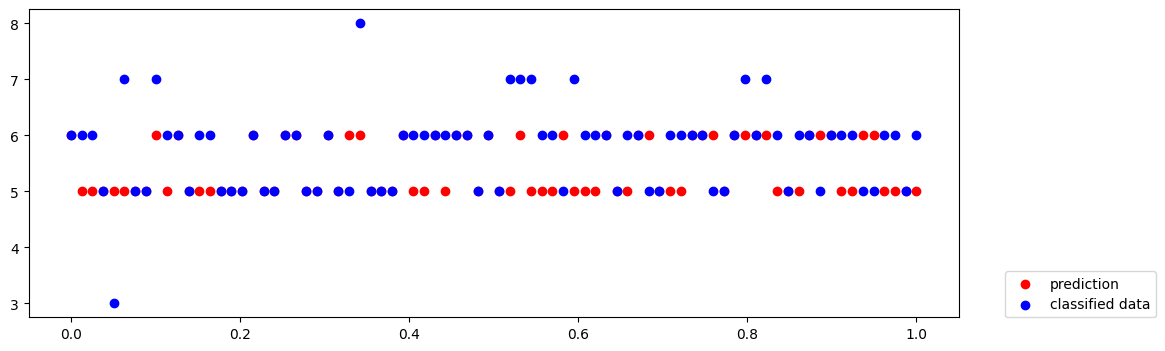

In [320]:
plt.figure(figsize = (12,4))

plt.scatter(np.linspace(0, 1, len(y1_test)), y1_pred, color = 'r')
plt.scatter(np.linspace(0, 1, len(y1_test)), y1_test, color = 'b')
plt.legend(['prediction', 'classified data'], loc = (1.05,0))

# for i in np.linspace(0, 1, len(y1_test)):
#     plt.plot([i,i], [y1.min(), y1.max()], color = 'violet', alpha = 0.3)
    
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred))